In [1]:
%run "..\..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML

772


In [2]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\hM1_MERFISH'
library_folder = pool_folder

In [4]:
[_fl for _fl in os.listdir(library_folder) if '.fasta' in _fl]

['designed_probe_sequences_hM1.fasta', 'MERFISH_readouts.fasta']

In [12]:
final_fasta = os.path.join(library_folder, r'designed_probe_sequences_hM1.fasta')
probes = []
with open(final_fasta, 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        probes.append(record)

In [29]:
gene_2_counts = {}
for _pb in probes:
    _gene_name = _pb.id.split('_'+_pb.id.split('_')[-1])[0]
    if _gene_name not in gene_2_counts.keys():
        gene_2_counts[_gene_name] = 1
    else:
        gene_2_counts[_gene_name] += 1

<IPython.core.display.Javascript object>


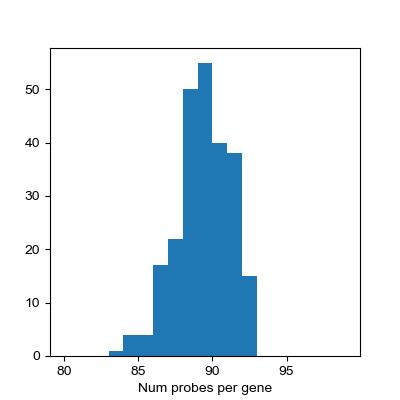

Text(0.5, 0, 'Num probes per gene')

In [34]:
plt.figure(figsize=(4,4))
plt.hist(list(gene_2_counts.values()), bins=np.arange(80,100))
plt.xlabel("Num probes per gene")

# MOP by Meng

In [35]:
final_fasta = os.path.join(r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Existing_MERFISH', 
                           r'M1_meng.fasta')
probes = []
with open(final_fasta, 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        probes.append(record)

'Igfbp6'

<IPython.core.display.Javascript object>


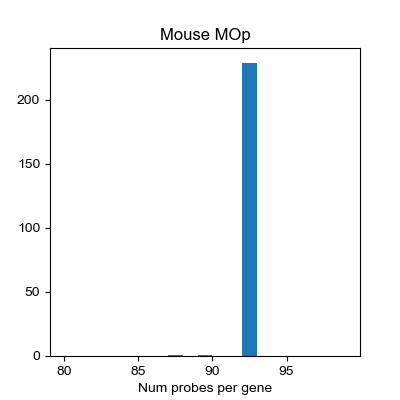

Text(0.5, 1.0, 'Mouse MOp')

In [48]:
gene_2_counts = {}
for _pb in probes:
    _gene_name = [_n.split('__')[0] for _n in _pb.description.split(' ') if '__' in _n][0]
    if _gene_name not in gene_2_counts.keys():
        gene_2_counts[_gene_name] = 1
    else:
        gene_2_counts[_gene_name] += 1
plt.figure(figsize=(4,4))
plt.hist(list(gene_2_counts.values()), bins=np.arange(80,100))
plt.xlabel("Num probes per gene")
plt.title("Mouse MOp")

In [ ]:



with SeqIO.read(final_fasta)

with open(encoding_file, 'r') as _handle:
    # start reading
    _lines = _handle.read().split('\n')
    for _line in _lines:
        _bits = [int(_i)-1 for _i in _line.split(' ') if len(_i) > 0]
        loaded_bits.append(_bits)

# Check codebook

In [10]:
import pandas as pd
codebook_filename = os.path.join(r'\\mendel\Mendel_SSD3\MERFISH_Analysis\20221003-hMTG_hM1_test', 'codebook_0_human_M1_codebook.csv')
print(codebook_filename)
if os.path.isfile(codebook_filename):
    codebook = pd.read_csv(codebook_filename, header=0, )

\\mendel\Mendel_SSD3\MERFISH_Analysis\20221003-hMTG_hM1_test\codebook_0_human_M1_codebook.csv


In [12]:
codebook['name']

0       Blank-1
1       Blank-2
2       Blank-3
3       Blank-4
4       Blank-5
         ...   
265        EPN2
266       NPTX1
267      ZNF536
268    KIAA1755
269     PCDH11X
Name: name, Length: 270, dtype: object

## ref table S12 from Chenglong's paper

In [23]:
ref_count_filename = os.path.join(r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Existing_MERFISH\10000_gene',
                                   'pnas.1912459116.sd12.csv')
ref_count_table = pd.read_csv(ref_count_filename).set_index('Unnamed: 0')

In [32]:
ref_count_table['Mean'] = np.mean(ref_count_table.values[:,1:],axis=1)

In [36]:
mean_counts = []
for _gene in codebook['name']:
    if _gene in ref_count_table.index:
        mean_counts.append(ref_count_table.loc[ref_count_table.index==_gene, 'Mean'].values[0])

<IPython.core.display.Javascript object>


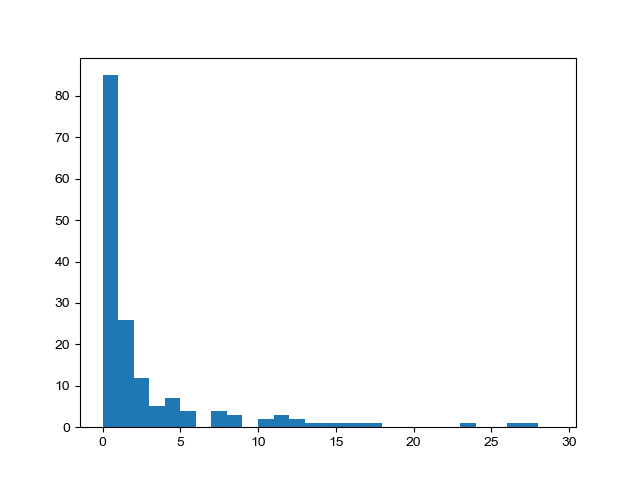

In [40]:
plt.figure()
plt.hist(mean_counts, bins=np.arange(0,30,1))
plt.show()

In [25]:
ref_count_table.index

Index(['A1CF', 'A2M', 'A2ML1', 'A4GALT', 'AACS', 'AACSP1', 'AAK1', 'AARS2',
       'AASDHPPT', 'AATF',
       ...
       'ZSWIM6', 'ZWILCH', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZZEF1',
       'ZZZ3', 'pk'],
      dtype='object', name='Unnamed: 0', length=12903)